In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import calendar

Populating the interactive namespace from numpy and matplotlib


In [84]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [85]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


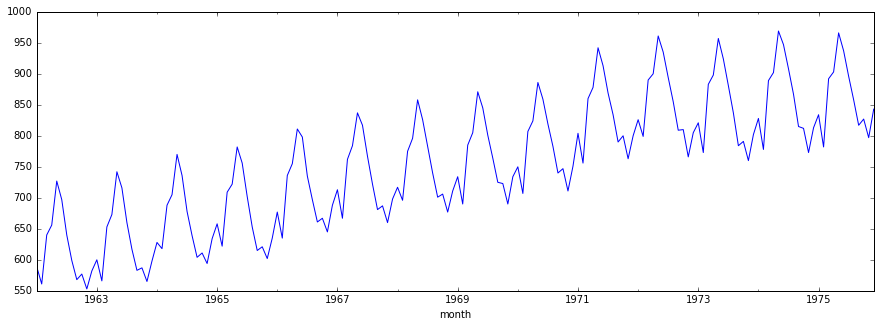

In [86]:
plt.figure(figsize(15,5))
milk.milk.plot()

In [87]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221299,
 0.6274267086030314,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [88]:
m_days = [calendar.monthrange(i.year, i.month)[1] for i in milk.index]

In [89]:
milk['daily']=milk.milk*1.0/m_days

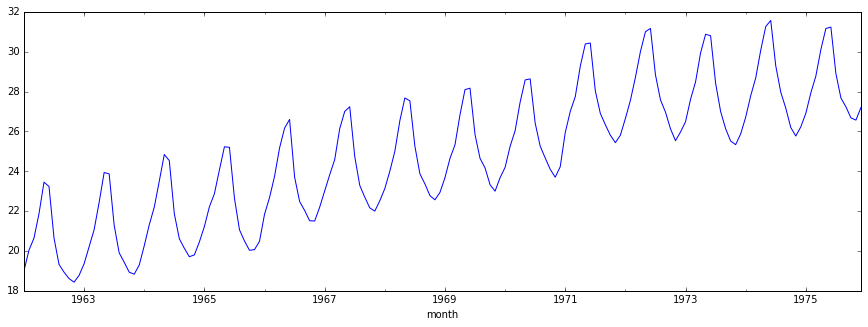

In [90]:
plt.figure(figsize(15,5))
milk['daily'].plot()

In [91]:
print sum(milk.daily)

4166.3266619


In [92]:
sm.tsa.stattools.adfuller(milk.daily)

(-1.1798216373266017,
 0.68221515130814492,
 12,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.5708067458066921)

In [93]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)
milk['daily_diff121'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

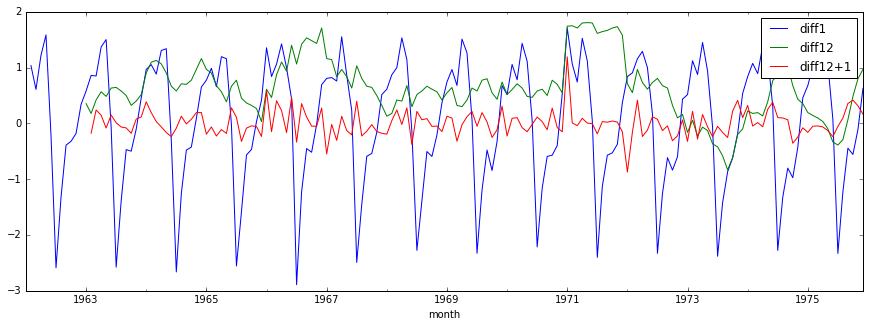

In [94]:
plt.figure(figsize(15,5))
milk.daily_diff1.plot(label='diff1')
milk.daily_diff12.plot(label='diff12')
milk.daily_diff121.plot(label='diff12+1')
plt.legend()

In [96]:
milk.daily_diff1.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff1)

(-2.75946947622894,
 0.064300546541742415,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.153997338105512)

In [97]:
milk.daily_diff12.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff12)

(-2.159486093288808,
 0.22127672658830372,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [98]:
milk.daily_diff121.dropna(inplace=True)
sm.tsa.stattools.adfuller(milk.daily_diff121)

(-5.4813263347969263,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

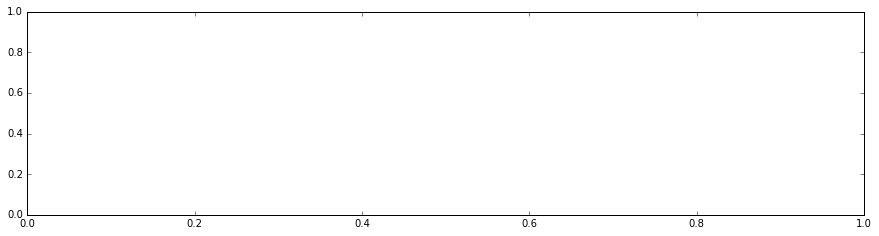

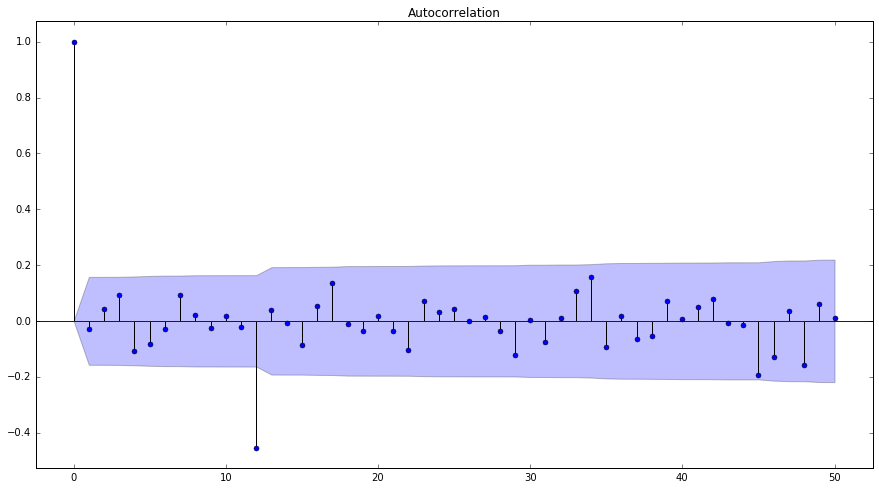

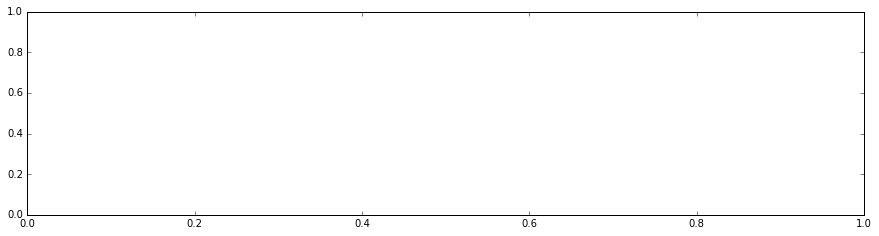

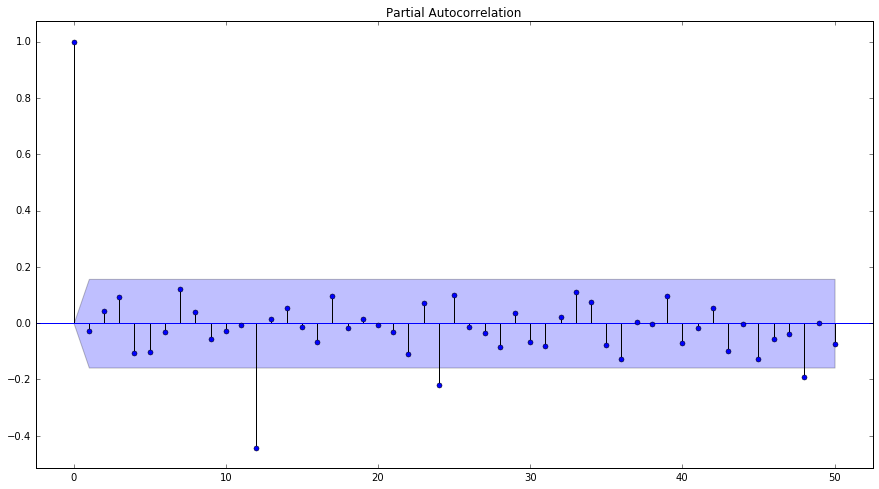

In [103]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(milk.daily_diff121.values.squeeze(), lags=50)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(milk.daily_diff121.values.squeeze(), lags=50)
pylab.show()

In [3]:
sm

<module 'statsmodels.api' from '/home/ar600/anaconda2/lib/python2.7/site-packages/statsmodels/api.pyc'>